# Extraction of extents from netcdf dataset

In [14]:
from awrams.utils.processing.extract import extract_from_filemanager

from awrams.utils.gis import ShapefileDB, CATCHMENT_SHAPEFILE
catchments = ShapefileDB(CATCHMENT_SHAPEFILE)

import awrams.utils.datetools as dt
from awrams.utils import extents
from awrams.utils.io.data_mapping import SplitFileManager

import os

# Plotting
from matplotlib import pyplot as plt
%matplotlib inline

## extract and spatially aggregate catchments

In [20]:
var_name = 'rain_day'

data_path = '../../test_data/calibration/'
pattern = data_path + '/%s*' % var_name

sfm = SplitFileManager.open_existing(data_path,pattern,var_name)

period = dt.dates('jul 1990 - jun 1995')

georef = sfm.get_extent().parent_ref

extent_map = {'204007':catchments.get_extent_by_field('StationID','204007',georef),
              '421103':catchments.get_extent_by_field('StationID','421103',georef)}

df = extract_from_filemanager(sfm,
             extent_map,
             period)
df

,421103,204007
1990-07-01,8.188409,NaN
1990-07-02,16.56741,NaN
1990-07-03,11.31588,NaN
1990-07-04,6.869347,NaN
1990-07-05,4.365312,NaN
1990-07-06,9.357732,NaN
1990-07-07,2.51397,NaN
1990-07-08,1.32421,NaN
1990-07-09,0,NaN
1990-07-10,0,NaN


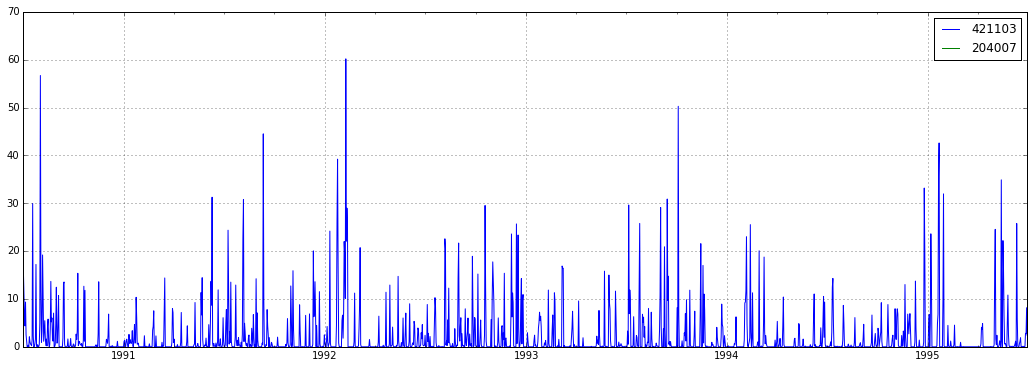

In [18]:
ax = plt.figure(figsize=(18,6)).gca()
df.plot(ax=ax)

## extract a catchment

In [21]:
period = dt.dates('jul 1990')

In [22]:
### requires osgeo.ogr to process shapefiles
catchment = extent_map['421103']
catchment.cell_count

9

In [23]:
# path = os.getcwd()
# path = os.path.join(path,'..','..','calibration','tests','data')

data = sfm.get_data(period,catchment)
sfm.close_all()

data.shape,catchment.cell_count

((31, 4, 3), 9)

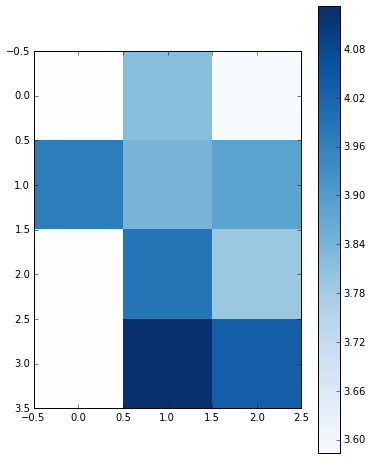

In [24]:
plt.figure(figsize=(6,8))
im = plt.imshow(data.mean(axis=0),interpolation='None',cmap=plt.get_cmap('Blues'))
plt.colorbar(im)